In [2]:
from google.colab import files
files.upload()

!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

!kaggle datasets download -d mishra5001/credit-card

cp: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory
Dataset URL: https://www.kaggle.com/datasets/mishra5001/credit-card
License(s): other
 99% 111M/112M [00:01<00:00, 84.5MB/s] 
100% 112M/112M [00:01<00:00, 66.3MB/s]


In [3]:
!unzip credit-card.zip

Archive:  credit-card.zip
  inflating: application_data.csv    
  inflating: columns_description.csv  
  inflating: previous_application.csv  


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df1 = pd.read_csv('application_data.csv')
#df3 = pd.read_csv('columns_description.csv')
df2 = pd.read_csv('previous_application.csv')

df1.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
df1.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY',
       ...
       'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20',
       'FLAG_DOCUMENT_21', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object', length=122)

In [6]:
df2.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,...,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,...,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,...,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,...,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
print(f" -Shape of df1 : {df1.shape}\n -Shape of df2 : {df2.shape}")


 -Shape of df1 : (307511, 122)
 -Shape of df2 : (1670214, 37)


In [8]:
df2.columns

Index(['SK_ID_PREV', 'SK_ID_CURR', 'NAME_CONTRACT_TYPE', 'AMT_ANNUITY',
       'AMT_APPLICATION', 'AMT_CREDIT', 'AMT_DOWN_PAYMENT', 'AMT_GOODS_PRICE',
       'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'FLAG_LAST_APPL_PER_CONTRACT', 'NFLAG_LAST_APPL_IN_DAY',
       'RATE_DOWN_PAYMENT', 'RATE_INTEREST_PRIMARY',
       'RATE_INTEREST_PRIVILEGED', 'NAME_CASH_LOAN_PURPOSE',
       'NAME_CONTRACT_STATUS', 'DAYS_DECISION', 'NAME_PAYMENT_TYPE',
       'CODE_REJECT_REASON', 'NAME_TYPE_SUITE', 'NAME_CLIENT_TYPE',
       'NAME_GOODS_CATEGORY', 'NAME_PORTFOLIO', 'NAME_PRODUCT_TYPE',
       'CHANNEL_TYPE', 'SELLERPLACE_AREA', 'NAME_SELLER_INDUSTRY',
       'CNT_PAYMENT', 'NAME_YIELD_GROUP', 'PRODUCT_COMBINATION',
       'DAYS_FIRST_DRAWING', 'DAYS_FIRST_DUE', 'DAYS_LAST_DUE_1ST_VERSION',
       'DAYS_LAST_DUE', 'DAYS_TERMINATION', 'NFLAG_INSURED_ON_APPROVAL'],
      dtype='object')

**Nettoyage de df1**

In [9]:
df1.isnull().sum()

,0
SK_ID_CURR,0
TARGET,0
NAME_CONTRACT_TYPE,0
CODE_GENDER,0
FLAG_OWN_CAR,0
...,...
AMT_REQ_CREDIT_BUREAU_DAY,41519
AMT_REQ_CREDIT_BUREAU_WEEK,41519
AMT_REQ_CREDIT_BUREAU_MON,41519
AMT_REQ_CREDIT_BUREAU_QRT,41519


<Axes: >

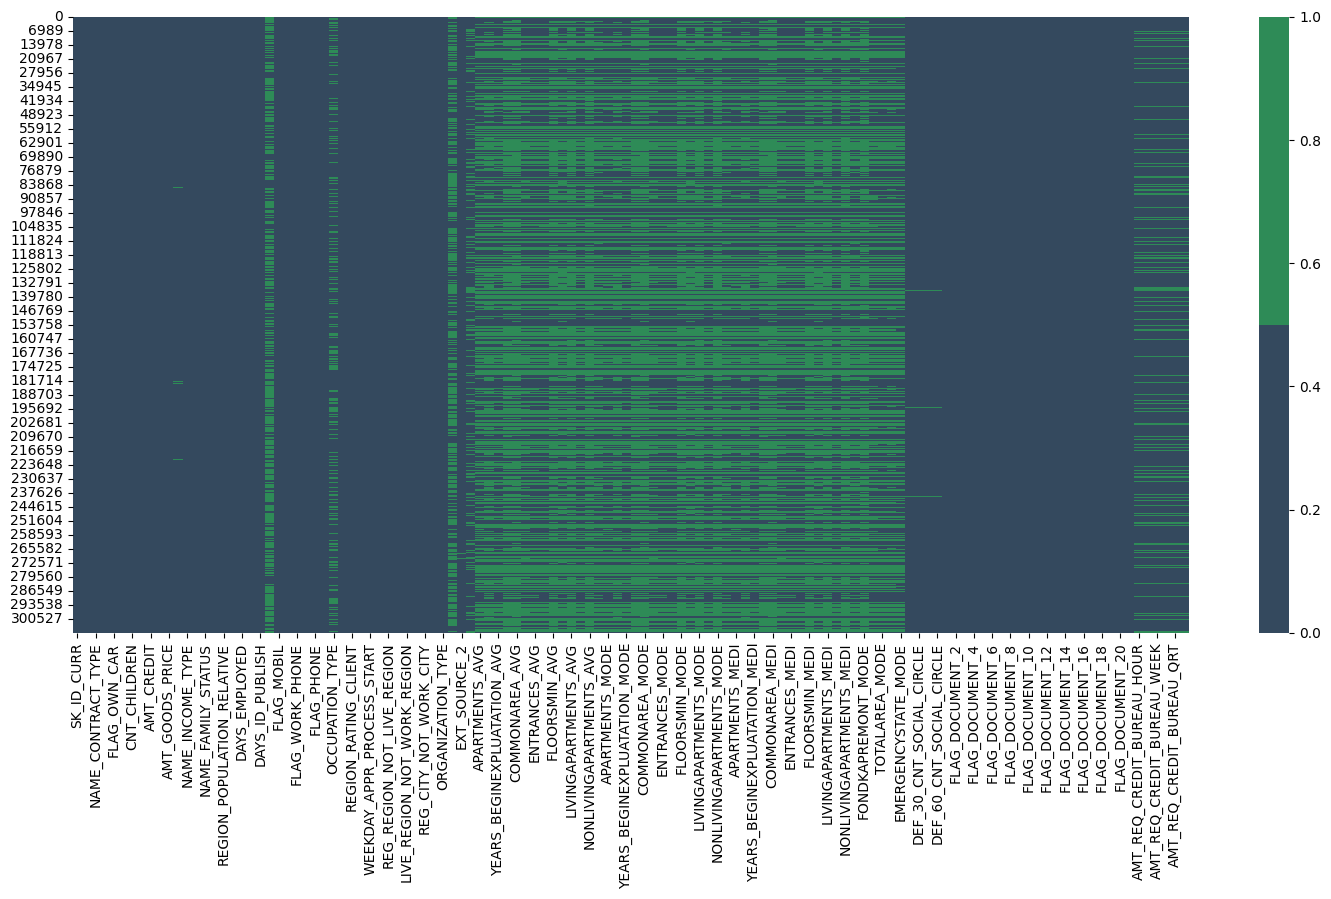

In [10]:
plt.figure(figsize=(18,8))

colours = ['#34495E', 'seagreen']
sns.heatmap(df1.isnull(), cmap=sns.color_palette(colours))

l edataseete 1 contient des colonnes presque vides

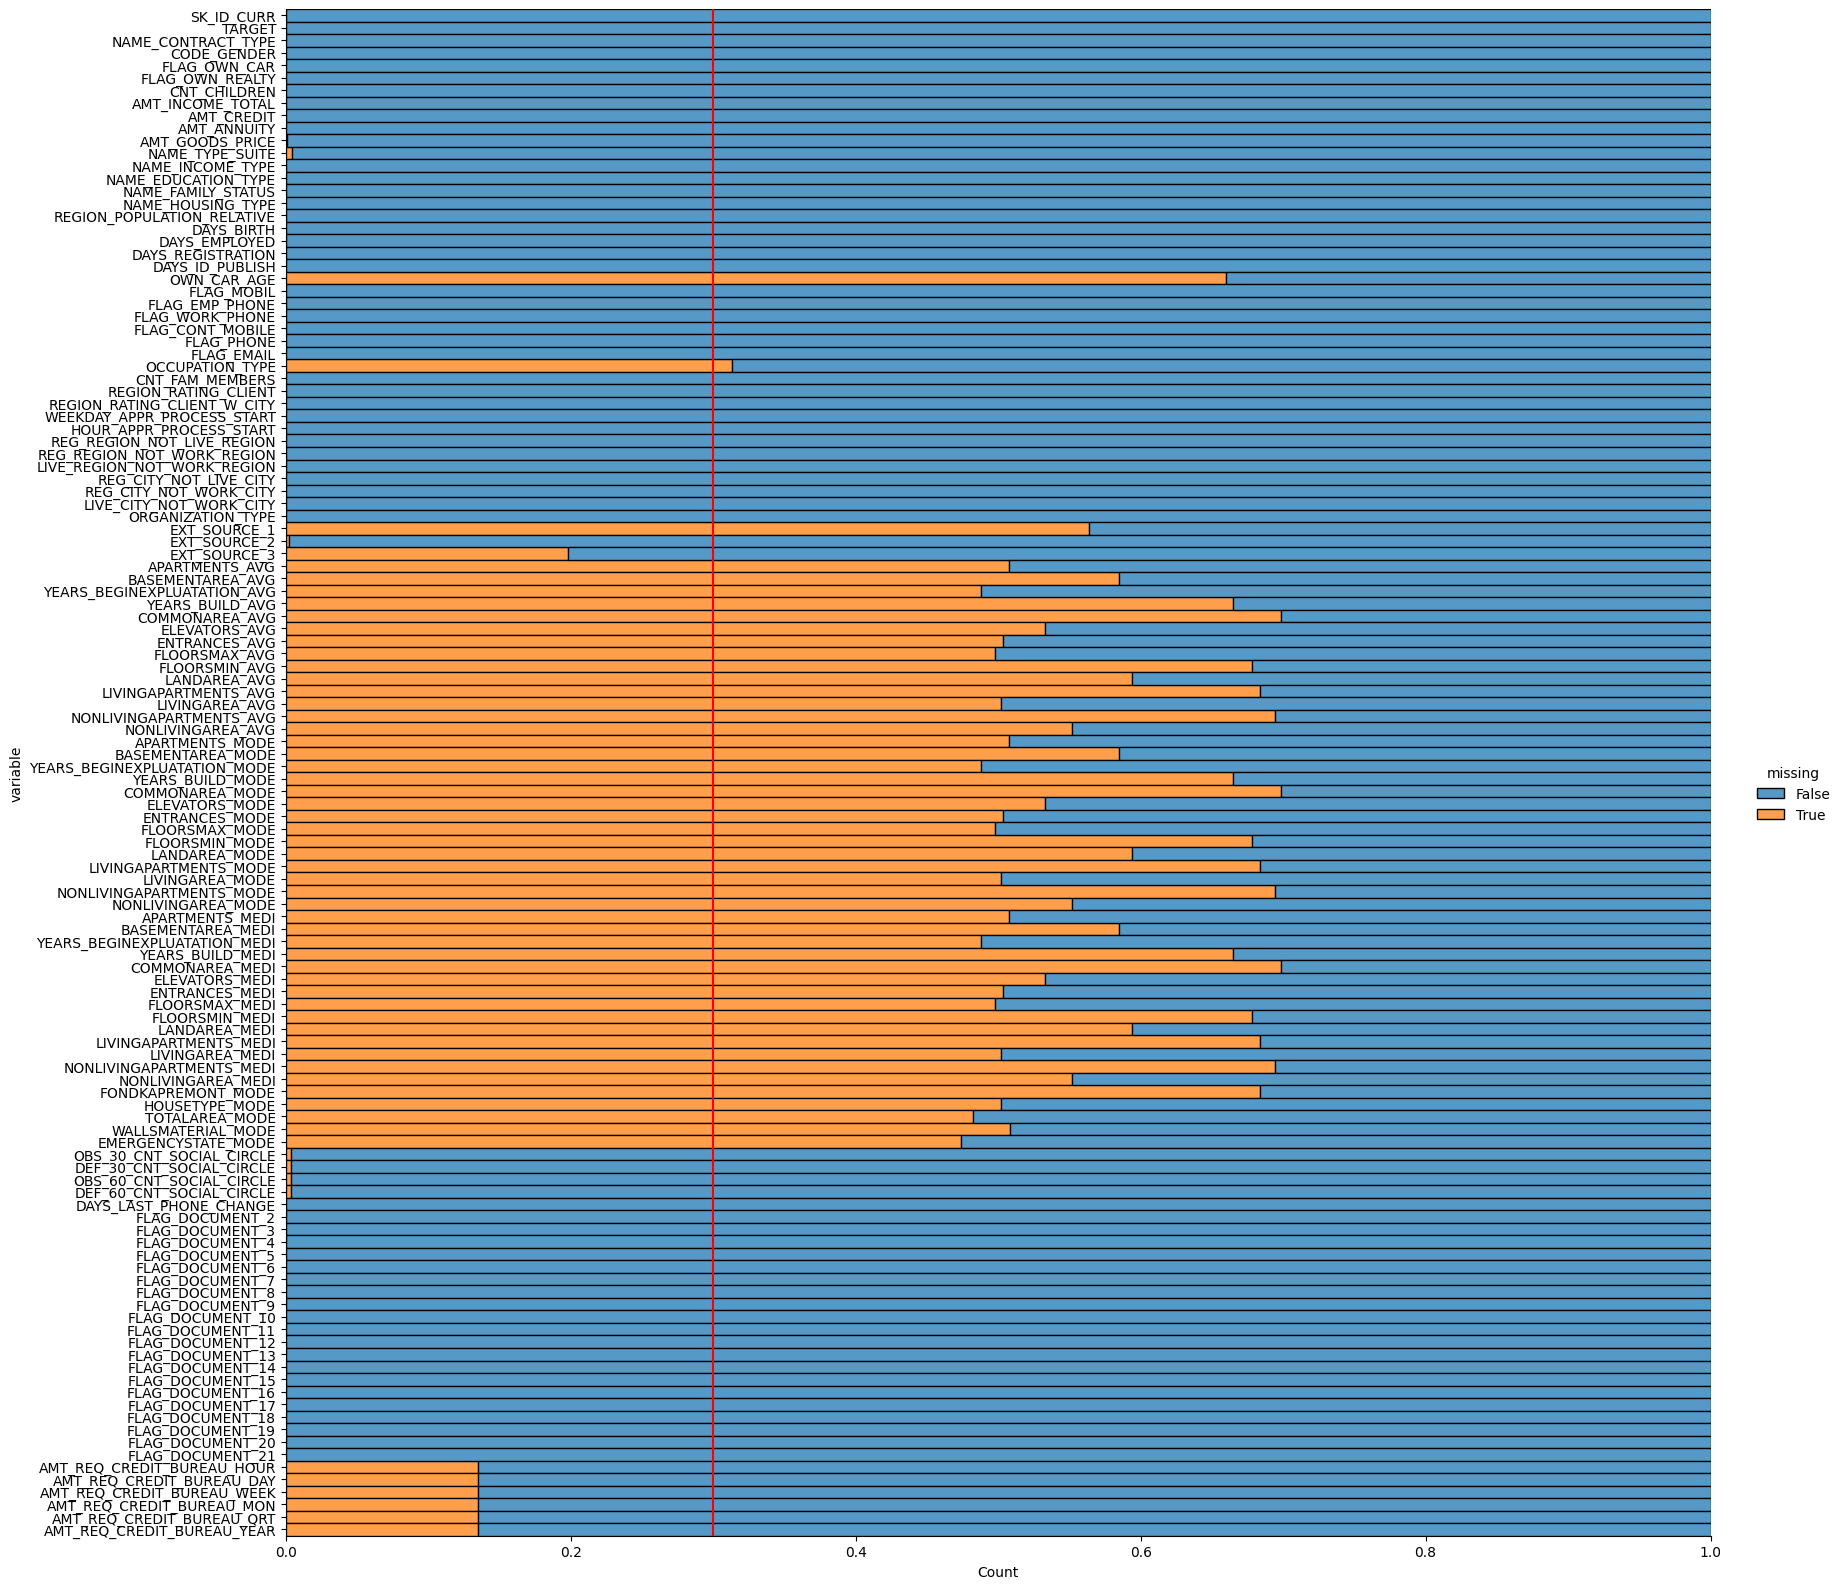

In [11]:
sns.displot(
    data=df1.isnull().melt(value_name='missing'),
    y='variable',
    hue='missing',
    multiple='fill',
    height=16,
    aspect=1.1
)

# specifying a threshold value
plt.axvline(0.3, color='r')

In [10]:
#Suppression des colonnes avec plus de 30% missing
percent_missing = df1.isnull().sum() * 100 / len(df1)
cols_wih_missing_30 = percent_missing[percent_missing > 30].index.tolist()

print(len(cols_wih_missing_30))
print(cols_wih_missing_30)

50
['OWN_CAR_AGE', 'OCCUPATION_TYPE', 'EXT_SOURCE_1', 'APARTMENTS_AVG', 'BASEMENTAREA_AVG', 'YEARS_BEGINEXPLUATATION_AVG', 'YEARS_BUILD_AVG', 'COMMONAREA_AVG', 'ELEVATORS_AVG', 'ENTRANCES_AVG', 'FLOORSMAX_AVG', 'FLOORSMIN_AVG', 'LANDAREA_AVG', 'LIVINGAPARTMENTS_AVG', 'LIVINGAREA_AVG', 'NONLIVINGAPARTMENTS_AVG', 'NONLIVINGAREA_AVG', 'APARTMENTS_MODE', 'BASEMENTAREA_MODE', 'YEARS_BEGINEXPLUATATION_MODE', 'YEARS_BUILD_MODE', 'COMMONAREA_MODE', 'ELEVATORS_MODE', 'ENTRANCES_MODE', 'FLOORSMAX_MODE', 'FLOORSMIN_MODE', 'LANDAREA_MODE', 'LIVINGAPARTMENTS_MODE', 'LIVINGAREA_MODE', 'NONLIVINGAPARTMENTS_MODE', 'NONLIVINGAREA_MODE', 'APARTMENTS_MEDI', 'BASEMENTAREA_MEDI', 'YEARS_BEGINEXPLUATATION_MEDI', 'YEARS_BUILD_MEDI', 'COMMONAREA_MEDI', 'ELEVATORS_MEDI', 'ENTRANCES_MEDI', 'FLOORSMAX_MEDI', 'FLOORSMIN_MEDI', 'LANDAREA_MEDI', 'LIVINGAPARTMENTS_MEDI', 'LIVINGAREA_MEDI', 'NONLIVINGAPARTMENTS_MEDI', 'NONLIVINGAREA_MEDI', 'FONDKAPREMONT_MODE', 'HOUSETYPE_MODE', 'TOTALAREA_MODE', 'WALLSMATERIAL_MODE'

afin de sovoir si ces colonnes sont importantes deans notre etudes , nous aurons besoin de vir keur interptation dans columns.csv

In [11]:
df3 = pd.read_csv('columns_description.csv', encoding='ISO-8859-1')
# Filtrer df3 pour ne garder que les lignes correspondant aux colonnes ayant >30% de valeurs manquantes
df3_filtered = df3[df3['Row'].isin(cols_wih_missing_30)]
pd.set_option("display.max_colwidth", None)
df3_filtered.head(20)

,Unnamed: 0,Table,Row,Description,Special
21,24,application_data,OWN_CAR_AGE,Age of client's car,NaN
28,31,application_data,OCCUPATION_TYPE,What kind of occupation does the client have,NaN
41,44,application_data,EXT_SOURCE_1,Normalized score from external data source,normalized
44,47,application_data,APARTMENTS_AVG,"Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor",normalized
45,48,application_data,BASEMENTAREA_AVG,"Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor",normalized
46,49,application_data,YEARS_BEGINEXPLUATATION_AVG,"Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor",normalized
47,50,application_data,YEARS_BUILD_AVG,"Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor",normalized
48,51,application_data,COMMONAREA_AVG,"Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor",normalized
49,52,application_data,ELEVATORS_AVG,"Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor",normalized
50,53,application_data,ENTRANCES_AVG,"Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor",normalized


Avant de suprimer ces colonnes , il faut s'assurer qu'elles n'ont pas d'effet sur la variable target. Nous calculcuolrons leur correlation avec target.

In [31]:
import scipy.stats as stat

modalities = df1['TARGET'].unique()
results = []

# Sélectionner uniquement les colonnes numériques
num_cols_liste = df1.select_dtypes(include=['number']).columns.tolist()
num_cols_liste.remove('TARGET')  # Exclure la colonne cible
num_cols_liste.remove('SK_ID_CURR')  # Exclure la colonne ID
results = []

for feature in num_cols_liste:
    st, p_value = stat.f_oneway(*[list(df1.loc[df1['TARGET'] == m, feature]) for m in modalities])
    if p_value < 0.05:
        results.append([feature, p_value, 'rejetée', 'Oui'])
    else:
        results.append([feature, p_value, 'acceptée', 'Non'])

anova_results = pd.DataFrame(results, columns=['Feature', 'p_value', 'H0 : Indépendance', 'H1 : Dépendance'])
anova_results.sort_values(by=['p_value'])

,Feature,p_value,H0 : Indépendance,H1 : Dépendance
6,DAYS_BIRTH,0.000000e+00,rejetée,Oui
19,REGION_RATING_CLIENT_W_CITY,2.078455e-250,rejetée,Oui
18,REGION_RATING_CLIENT,2.172433e-234,rejetée,Oui
9,DAYS_ID_PUBLISH,2.527524e-179,rejetée,Oui
25,REG_CITY_NOT_WORK_CITY,3.805463e-176,rejetée,Oui
...,...,...,...,...
99,AMT_REQ_CREDIT_BUREAU_DAY,NaN,acceptée,Non
100,AMT_REQ_CREDIT_BUREAU_WEEK,NaN,acceptée,Non
101,AMT_REQ_CREDIT_BUREAU_MON,NaN,acceptée,Non
102,AMT_REQ_CREDIT_BUREAU_QRT,NaN,acceptée,Non


In [32]:
num_cols_target_depend = anova_results[anova_results['H1 : Dépendance'] == 'Oui'].shape[0]
num_cols_target_independ = anova_results[anova_results['H1 : Dépendance'] == 'Non'].shape[0]

print(f" Nombre de colonnes dépendantes de TARGET : {num_cols_target_depend}")
print(f" Nombre de colonnes non dépendantes de TARGET : {num_cols_target_independ}")


 Nombre de colonnes dépendantes de TARGET : 31
 Nombre de colonnes non dépendantes de TARGET : 73


Nous allons supprimer les 74 colonnes qui sont indépendantes de TARGET

In [33]:
#columns wich are indpedante from Target:
cols_anova_to_drop = anova_results[anova_results['H1 : Dépendance'] == 'Non']['Feature'].tolist()
cols_to_drop = cols_wih_missing_30 + cols_anova_to_drop

# 2. Drop these columns
df1_reduced = df1.drop(columns=cols_to_drop)

# 3. Verifie new df1
print(f"Nombre de colonnes restantes dans df1 : {df1_reduced.shape[1]}")
print(f"Colonnes supprimées : {cols_to_drop}")

Nombre de colonnes restantes dans df1 : 44
Colonnes supprimées : ['OWN_CAR_AGE', 'OCCUPATION_TYPE', 'EXT_SOURCE_1', 'APARTMENTS_AVG', 'BASEMENTAREA_AVG', 'YEARS_BEGINEXPLUATATION_AVG', 'YEARS_BUILD_AVG', 'COMMONAREA_AVG', 'ELEVATORS_AVG', 'ENTRANCES_AVG', 'FLOORSMAX_AVG', 'FLOORSMIN_AVG', 'LANDAREA_AVG', 'LIVINGAPARTMENTS_AVG', 'LIVINGAREA_AVG', 'NONLIVINGAPARTMENTS_AVG', 'NONLIVINGAREA_AVG', 'APARTMENTS_MODE', 'BASEMENTAREA_MODE', 'YEARS_BEGINEXPLUATATION_MODE', 'YEARS_BUILD_MODE', 'COMMONAREA_MODE', 'ELEVATORS_MODE', 'ENTRANCES_MODE', 'FLOORSMAX_MODE', 'FLOORSMIN_MODE', 'LANDAREA_MODE', 'LIVINGAPARTMENTS_MODE', 'LIVINGAREA_MODE', 'NONLIVINGAPARTMENTS_MODE', 'NONLIVINGAREA_MODE', 'APARTMENTS_MEDI', 'BASEMENTAREA_MEDI', 'YEARS_BEGINEXPLUATATION_MEDI', 'YEARS_BUILD_MEDI', 'COMMONAREA_MEDI', 'ELEVATORS_MEDI', 'ENTRANCES_MEDI', 'FLOORSMAX_MEDI', 'FLOORSMIN_MEDI', 'LANDAREA_MEDI', 'LIVINGAPARTMENTS_MEDI', 'LIVINGAREA_MEDI', 'NONLIVINGAPARTMENTS_MEDI', 'NONLIVINGAREA_MEDI', 'FONDKAPREMONT_M

In [34]:
df1_reduced.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE',
       'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE',
       'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'FLAG_EMP_PHONE',
       'FLAG_WORK_PHONE', 'FLAG_PHONE', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'WEEKDAY_APPR_PROCESS_START',
       'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION',
       'REG_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY',
       'ORGANIZATION_TYPE', 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3',
       'FLAG_DOCUMENT_6', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9',
       'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14',
       'FLAG_DOCUMENT_15', 'FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_18',
     

In [35]:
df1_reduced.isnull().sum()

,0
SK_ID_CURR,0
TARGET,0
NAME_CONTRACT_TYPE,0
CODE_GENDER,0
FLAG_OWN_CAR,0
FLAG_OWN_REALTY,0
CNT_CHILDREN,0
AMT_INCOME_TOTAL,0
AMT_CREDIT,0
NAME_TYPE_SUITE,1292


Nous garderons que les colonnes dépendantes avec la TARGET

Les colonnes avec plus de 30% de missing values sernot supprimées de df1.

En effectue la meme démarche avec df2

In [36]:
df2.columns

Index(['SK_ID_PREV', 'SK_ID_CURR', 'NAME_CONTRACT_TYPE', 'AMT_ANNUITY',
       'AMT_APPLICATION', 'AMT_CREDIT', 'AMT_DOWN_PAYMENT', 'AMT_GOODS_PRICE',
       'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'FLAG_LAST_APPL_PER_CONTRACT', 'NFLAG_LAST_APPL_IN_DAY',
       'RATE_DOWN_PAYMENT', 'RATE_INTEREST_PRIMARY',
       'RATE_INTEREST_PRIVILEGED', 'NAME_CASH_LOAN_PURPOSE',
       'NAME_CONTRACT_STATUS', 'DAYS_DECISION', 'NAME_PAYMENT_TYPE',
       'CODE_REJECT_REASON', 'NAME_TYPE_SUITE', 'NAME_CLIENT_TYPE',
       'NAME_GOODS_CATEGORY', 'NAME_PORTFOLIO', 'NAME_PRODUCT_TYPE',
       'CHANNEL_TYPE', 'SELLERPLACE_AREA', 'NAME_SELLER_INDUSTRY',
       'CNT_PAYMENT', 'NAME_YIELD_GROUP', 'PRODUCT_COMBINATION',
       'DAYS_FIRST_DRAWING', 'DAYS_FIRST_DUE', 'DAYS_LAST_DUE_1ST_VERSION',
       'DAYS_LAST_DUE', 'DAYS_TERMINATION', 'NFLAG_INSURED_ON_APPROVAL'],
      dtype='object')

In [37]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

In [38]:
df2.shape

(1670214, 37)

In [39]:
df2.isnull().sum()

,0
SK_ID_PREV,0
SK_ID_CURR,0
NAME_CONTRACT_TYPE,0
AMT_ANNUITY,372235
AMT_APPLICATION,0
AMT_CREDIT,1
AMT_DOWN_PAYMENT,895844
AMT_GOODS_PRICE,385515
WEEKDAY_APPR_PROCESS_START,0
HOUR_APPR_PROCESS_START,0


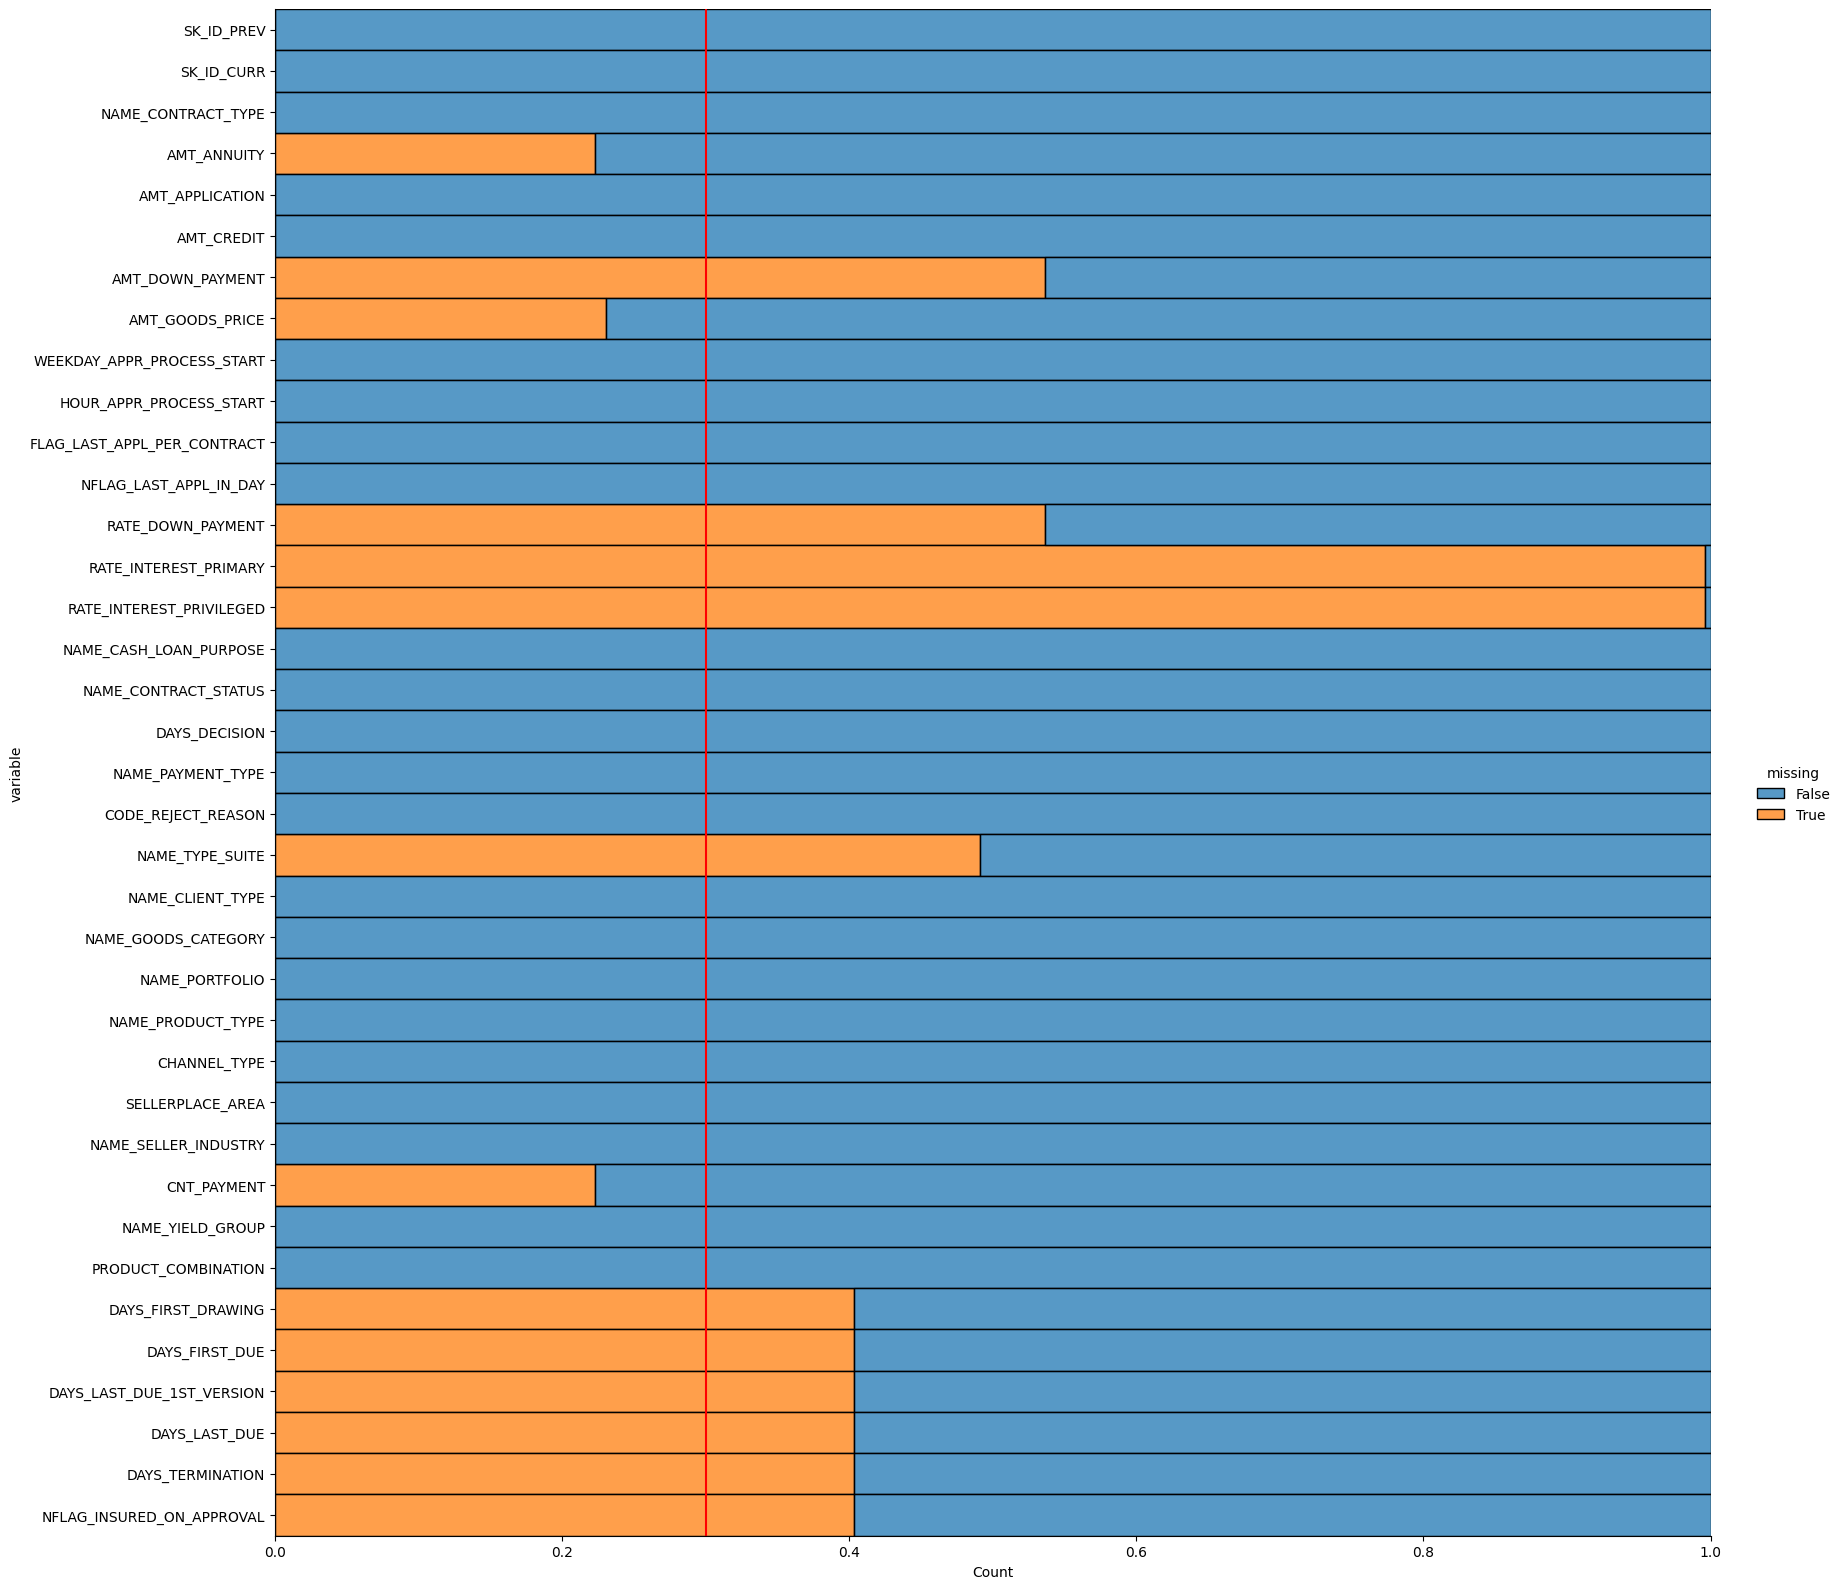

In [8]:
sns.displot(
    data=df2.isnull().melt(value_name='missing'),
    y='variable',
    hue='missing',
    multiple='fill',
    height=16,
    aspect=1.1
)

# specifying a threshold value
plt.axvline(0.3, color='r')

In [40]:
# Liste des colonnes dont on veut connaitre leur discription dans le dataset df3
cols_to_describe = ['CNT_PAYMENT', 'DAYS_FIRST_DUE', 'DAY_FIRST_DRAWING', 'DAY_TERMINATION']

# Filtrer df3 pour ne garder que les lignes correspondant à ces colonnes
df3_filtered = df3[df3['Row'].isin(cols_to_describe)]

# Afficher les descriptions
print(df3_filtered[['Row', 'Description']])

                Row  \
151     CNT_PAYMENT   
155  DAYS_FIRST_DUE   

                                                                                                               Description  
151                                                     Term of previous credit at application of the previous application  
155  Relative to application date of current application when was the first due supposed to be of the previous application  


In [41]:
percent_missing_2 = df2.isnull().sum() * 100 / len(df2)
cols_wih_missing_2 = percent_missing_2[percent_missing_2 > 50].index.tolist()

print(len(cols_wih_missing_2))
print(cols_wih_missing_2)

4
['AMT_DOWN_PAYMENT', 'RATE_DOWN_PAYMENT', 'RATE_INTEREST_PRIMARY', 'RATE_INTEREST_PRIVILEGED']


In [42]:
df2_reduced = df2.drop(columns=cols_wih_missing_2)
df2_reduced.shape

(1670214, 33)

In [43]:
df1_reduced.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,...,FLAG_DOCUMENT_6,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_11,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_18,FLAG_DOCUMENT_21
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,...,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.00000,307511.000000,307511.000000,307511.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,0.020868,-16036.995067,63815.045904,-4986.120328,-2994.202373,...,0.088055,0.081376,0.003896,0.003912,0.003525,0.002936,0.00121,0.009928,0.008130,0.000335
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,0.013831,4363.988632,141275.766519,3522.886321,1509.450419,...,0.283376,0.273412,0.062295,0.062424,0.059268,0.054110,0.03476,0.099144,0.089798,0.018299
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,0.000290,-25229.000000,-17912.000000,-24672.000000,-7197.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
25%,189145.500000,0.000000,0.000000,1.125000e+05,2.700000e+05,0.010006,-19682.000000,-2760.000000,-7479.500000,-4299.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
50%,278202.000000,0.000000,0.000000,1.471500e+05,5.135310e+05,0.018850,-15750.000000,-1213.000000,-4504.000000,-3254.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
75%,367142.500000,0.000000,1.000000,2.025000e+05,8.086500e+05,0.028663,-12413.000000,-289.000000,-2010.000000,-1720.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
max,456255.000000,1.000000,19.000000,1.170000e+08,4.050000e+06,0.072508,-7489.000000,365243.000000,0.000000,0.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000


In [44]:
df2.describe()

,SK_ID_PREV,SK_ID_CURR,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,HOUR_APPR_PROCESS_START,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,...,RATE_INTEREST_PRIVILEGED,DAYS_DECISION,SELLERPLACE_AREA,CNT_PAYMENT,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
count,1.670214e+06,1.670214e+06,1.297979e+06,1.670214e+06,1.670213e+06,7.743700e+05,1.284699e+06,1.670214e+06,1.670214e+06,774370.000000,...,5951.000000,1.670214e+06,1.670214e+06,1.297984e+06,997149.000000,997149.000000,997149.000000,997149.000000,997149.000000,997149.000000
mean,1.923089e+06,2.783572e+05,1.595512e+04,1.752339e+05,1.961140e+05,6.697402e+03,2.278473e+05,1.248418e+01,9.964675e-01,0.079637,...,0.773503,-8.806797e+02,3.139511e+02,1.605408e+01,342209.855039,13826.269337,33767.774054,76582.403064,81992.343838,0.332570
std,5.325980e+05,1.028148e+05,1.478214e+04,2.927798e+05,3.185746e+05,2.092150e+04,3.153966e+05,3.334028e+00,5.932963e-02,0.107823,...,0.100879,7.790997e+02,7.127443e+03,1.456729e+01,88916.115834,72444.869708,106857.034789,149647.415123,153303.516729,0.471134
min,1.000001e+06,1.000010e+05,0.000000e+00,0.000000e+00,0.000000e+00,-9.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00,-0.000015,...,0.373150,-2.922000e+03,-1.000000e+00,0.000000e+00,-2922.000000,-2892.000000,-2801.000000,-2889.000000,-2874.000000,0.000000
25%,1.461857e+06,1.893290e+05,6.321780e+03,1.872000e+04,2.416050e+04,0.000000e+00,5.084100e+04,1.000000e+01,1.000000e+00,0.000000,...,0.715645,-1.300000e+03,-1.000000e+00,6.000000e+00,365243.000000,-1628.000000,-1242.000000,-1314.000000,-1270.000000,0.000000
50%,1.923110e+06,2.787145e+05,1.125000e+04,7.104600e+04,8.054100e+04,1.638000e+03,1.123200e+05,1.200000e+01,1.000000e+00,0.051605,...,0.835095,-5.810000e+02,3.000000e+00,1.200000e+01,365243.000000,-831.000000,-361.000000,-537.000000,-499.000000,0.000000
75%,2.384280e+06,3.675140e+05,2.065842e+04,1.803600e+05,2.164185e+05,7.740000e+03,2.340000e+05,1.500000e+01,1.000000e+00,0.108909,...,0.852537,-2.800000e+02,8.200000e+01,2.400000e+01,365243.000000,-411.000000,129.000000,-74.000000,-44.000000,1.000000
max,2.845382e+06,4.562550e+05,4.180581e+05,6.905160e+06,6.905160e+06,3.060045e+06,6.905160e+06,2.300000e+01,1.000000e+00,1.000000,...,1.000000,-1.000000e+00,4.000000e+06,8.400000e+01,365243.000000,365243.000000,365243.000000,365243.000000,365243.000000,1.000000


In [45]:
common_cols = df1_reduced.columns.intersection(df2_reduced.columns)
print(common_cols)

Index(['SK_ID_CURR', 'NAME_CONTRACT_TYPE', 'AMT_CREDIT', 'NAME_TYPE_SUITE',
       'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START'],
      dtype='object')


In [46]:
df_joined = pd.merge(df1_reduced, df2_reduced, on='SK_ID_CURR', how='inner')
df_joined.shape

(1413701, 76)

In [47]:
df_joined.isnull().sum()

,0
SK_ID_CURR,0
TARGET,0
NAME_CONTRACT_TYPE_x,0
CODE_GENDER,0
FLAG_OWN_CAR,0
...,...
DAYS_FIRST_DUE,561106
DAYS_LAST_DUE_1ST_VERSION,561106
DAYS_LAST_DUE,561106
DAYS_TERMINATION,561106


In [48]:
df_joined.dtypes

,0
SK_ID_CURR,int64
TARGET,int64
NAME_CONTRACT_TYPE_x,object
CODE_GENDER,object
FLAG_OWN_CAR,object
...,...
DAYS_FIRST_DUE,float64
DAYS_LAST_DUE_1ST_VERSION,float64
DAYS_LAST_DUE,float64
DAYS_TERMINATION,float64


In [49]:
cat_cols = df_joined.select_dtypes(include=['object']).columns.tolist()
num_cols = df_joined.select_dtypes(include=['number']).columns.tolist()
print(f" Number of categoriel columns in df_joined: {len(cat_cols)}")
print(f" Number of numerical columns in df_joined: {len(num_cols)}")

 Number of categoriel columns in df_joined: 27
 Number of numerical columns in df_joined: 49


In [50]:
df_joined.duplicated().sum()

0

Bien que d'autre méthode de feature selection existent, nous allons reduire notre dataset à 10 colonnes ; 5 numériques et 5 catégorielles. D'abord selon Anova pour les colonnes numériques puis selon  le test chi2 pour les clonnes catégorielles

In [51]:
corr_with_target = df_joined[num_cols].corr()['TARGET'].sort_values(ascending=False)
top_5_num_cols = corr_with_target[corr_with_target.index.isin(num_cols)].head(5)

In [57]:
top_5_num_cols

,TARGET
TARGET,1.000000
DAYS_BIRTH,0.074866
REGION_RATING_CLIENT_W_CITY,0.059700
REGION_RATING_CLIENT,0.056932
DAYS_ID_PUBLISH,0.051037


Test Chi2

In [52]:
from sklearn.feature_selection import chi2
#fisrt we need to encode categoriel columns
cat_cols_encoded = pd.get_dummies(df_joined[cat_cols])

In [53]:
#Apply chi2 test
chi2_scores, p_values = chi2(cat_cols_encoded, df_joined['TARGET'])

In [54]:
chi2_results = pd.DataFrame({'Feature': cat_cols_encoded.columns, 'Chi2_Score': chi2_scores, 'p_value': p_values})
chi2_results = chi2_results.sort_values(by='Chi2_Score', ascending=False)
top_5_cat_cols = chi2_results.head(5)
top_5_cat_cols

,Feature,Chi2_Score,p_value
144,NAME_CONTRACT_STATUS_Refused,3464.777016,0.0
18,NAME_INCOME_TYPE_Pensioner,2754.366776,0.0
103,ORGANIZATION_TYPE_XNA,2708.755973,0.0
24,NAME_EDUCATION_TYPE_Higher education,2688.544063,0.0
3,CODE_GENDER_M,2670.414405,0.0


In [55]:
print(top_5_num_cols.index.tolist())
print(top_5_cat_cols['Feature'].tolist())

['TARGET', 'DAYS_BIRTH', 'REGION_RATING_CLIENT_W_CITY', 'REGION_RATING_CLIENT', 'DAYS_ID_PUBLISH']
['NAME_CONTRACT_STATUS_Refused', 'NAME_INCOME_TYPE_Pensioner', 'ORGANIZATION_TYPE_XNA', 'NAME_EDUCATION_TYPE_Higher education', 'CODE_GENDER_M']


On remarque que les noms des colonnes catégorielles ont été modifiés, probabelement suite à l'encodage one hot.

Nous repreons les noms d'irgines de ces colonnes en supprimant les suffixes ajoutés.

In [67]:
top_5_cat_cols = ['NAME_CONTRACT_STATUS', 'NAME_INCOME_TYPE', 'ORGANIZATION_TYPE', 'NAME_EDUCATION_TYPE', 'CODE_GENDER']
top_5_num_cols = ['SK_ID_CURR', 'TARGET', 'DAYS_BIRTH', 'REGION_RATING_CLIENT_W_CITY', 'REGION_RATING_CLIENT', 'DAYS_ID_PUBLISH']

df = df_joined[top_5_num_cols + top_5_cat_cols]
df.head()

,SK_ID_CURR,TARGET,DAYS_BIRTH,REGION_RATING_CLIENT_W_CITY,REGION_RATING_CLIENT,DAYS_ID_PUBLISH,NAME_CONTRACT_STATUS,NAME_INCOME_TYPE,ORGANIZATION_TYPE,NAME_EDUCATION_TYPE,CODE_GENDER
0,100002,1,-9461,2,2,-2120,Approved,Working,Business Entity Type 3,Secondary / secondary special,M
1,100003,0,-16765,1,1,-291,Approved,State servant,School,Higher education,F
2,100003,0,-16765,1,1,-291,Approved,State servant,School,Higher education,F
3,100003,0,-16765,1,1,-291,Approved,State servant,School,Higher education,F
4,100004,0,-19046,2,2,-2531,Approved,Working,Government,Secondary / secondary special,M


In [68]:
df.shape

(1413701, 11)

In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1413701 entries, 0 to 1413700
Data columns (total 11 columns):
 #   Column                       Non-Null Count    Dtype 
---  ------                       --------------    ----- 
 0   SK_ID_CURR                   1413701 non-null  int64 
 1   TARGET                       1413701 non-null  int64 
 2   DAYS_BIRTH                   1413701 non-null  int64 
 3   REGION_RATING_CLIENT_W_CITY  1413701 non-null  int64 
 4   REGION_RATING_CLIENT         1413701 non-null  int64 
 5   DAYS_ID_PUBLISH              1413701 non-null  int64 
 6   NAME_CONTRACT_STATUS         1413701 non-null  object
 7   NAME_INCOME_TYPE             1413701 non-null  object
 8   ORGANIZATION_TYPE            1413701 non-null  object
 9   NAME_EDUCATION_TYPE          1413701 non-null  object
 10  CODE_GENDER                  1413701 non-null  object
dtypes: int64(6), object(5)
memory usage: 118.6+ MB


In [70]:
df.isnull().sum()

,0
SK_ID_CURR,0
TARGET,0
DAYS_BIRTH,0
REGION_RATING_CLIENT_W_CITY,0
REGION_RATING_CLIENT,0
DAYS_ID_PUBLISH,0
NAME_CONTRACT_STATUS,0
NAME_INCOME_TYPE,0
ORGANIZATION_TYPE,0
NAME_EDUCATION_TYPE,0


df.describe()

In [71]:
df.describe()

,SK_ID_CURR,TARGET,DAYS_BIRTH,REGION_RATING_CLIENT_W_CITY,REGION_RATING_CLIENT,DAYS_ID_PUBLISH
count,1.413701e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.413701e+06
mean,2.784813e+05,8.655296e-02,-1.632105e+04,2.037603e+00,2.059638e+00,-3.034563e+03
std,1.028118e+05,2.811789e-01,4.344557e+03,4.886431e-01,4.957797e-01,1.507376e+03
min,1.000020e+05,0.000000e+00,-2.520100e+04,1.000000e+00,1.000000e+00,-7.197000e+03
25%,1.893640e+05,0.000000e+00,-1.998000e+04,2.000000e+00,2.000000e+00,-4.319000e+03
50%,2.789920e+05,0.000000e+00,-1.604400e+04,2.000000e+00,2.000000e+00,-3.330000e+03
75%,3.675560e+05,0.000000e+00,-1.273900e+04,2.000000e+00,2.000000e+00,-1.783000e+03
max,4.562550e+05,1.000000e+00,-7.489000e+03,3.000000e+00,3.000000e+00,0.000000e+00


In [73]:
df["DAYS_BIRTH"].unique()

array([ -9461, -16765, -19046, ...,  -7857, -25061, -24864])

In [80]:
df = df.copy()  # Copie du DataFrame pour éviter le warning
df['AGE'] = round(abs(df['DAYS_BIRTH']) / 365, 1)
df['AGE'].unique()

array([25.9, 45.9, 52.2, 52.1, 54.6, 46.4, 37.7, 51.6, 55.1, 39.6, 27.9,
       55.9, 36.8, 38.6, 40. , 23.9, 35.4, 26.8, 48.5, 31.1, 40.6, 30.5,
       68. , 30.9, 53. , 43.7, 27.4, 28.3, 41.9, 35.5, 32. , 43.8, 33.3,
       47.1, 57.7, 65.5, 44.2, 47.9, 46.5, 36.7, 64.5, 26.9, 21.8, 55.8,
       54. , 50. , 51. , 33.6, 28.7, 59.2, 38.9, 56.3, 21.7, 62.6, 33.5,
       33. , 53.6, 42.1, 32.8, 29.7, 32.9, 42.2, 40.7, 30.6, 39.1, 48.1,
       53.3, 26.5, 62.8, 51.2, 48. , 47.6, 63.1, 43.6, 49.7, 57.8, 50.8,
       54.3, 35. , 29.4, 41.5, 40.4, 61.6, 26.4, 46. , 30. , 65. , 65.9,
       35.3, 58.5, 28.8, 37.9, 64.8, 25.2, 55.6, 39.3, 36.4, 62.7, 44.6,
       62.9, 44.8, 45.3, 44.1, 50.4, 32.7, 39. , 33.8, 40.1, 45.7, 44.4,
       60.2, 41.4, 31.9, 48.4, 39.2, 52.8, 31.2, 42.7, 37.1, 67.8, 55.4,
       59.9, 42. , 38.3, 59.8, 49. , 35.1, 31.7, 35.9, 57.1, 46.3, 63. ,
       53.5, 50.1, 34.7, 45.1, 38.4, 38. , 27.7, 59.5, 54.2, 37.3, 36.2,
       38.8, 37.2, 38.2, 49.2, 48.9, 50.2, 45.5, 43

In [81]:
df["AGE"].nunique()

482

In [82]:
print(f"The Maximal Age is {df['AGE'].max()} years old")
print(f"The Minimal Age is {df['AGE'].min()} years old")

The Maximal Age is 69.0 years old
The Minimal Age is 20.5 years old


In [108]:
df["DAYS_ID_PUBLISH"].unique()

array([-2120,  -291, -2531, ..., -5906, -5854, -6211])

In [114]:
# Convertir les jours en dates réelles sans l'heure
df['PUBLISH_DATE'] = (pd.to_datetime('today') + pd.to_timedelta(df['DAYS_ID_PUBLISH'], unit='D')).dt.date

df['PUBLISH_DATE']

,PUBLISH_DATE
0,2019-05-11
1,2024-05-13
2,2024-05-13
3,2024-05-13
4,2018-03-26
...,...
1413696,2024-01-15
1413697,2024-01-15
1413698,2024-01-15
1413699,2024-01-15


In [116]:
# Sélectionner les colonnes numériques, sans la colonne TARGET
df_num_cols = df[["AGE",	"REGION_RATING_CLIENT_W_CITY",	"REGION_RATING_CLIENT"]]

# Sélectionner les colonnes catégorielles
df_cat_cols = df[top_5_cat_cols]


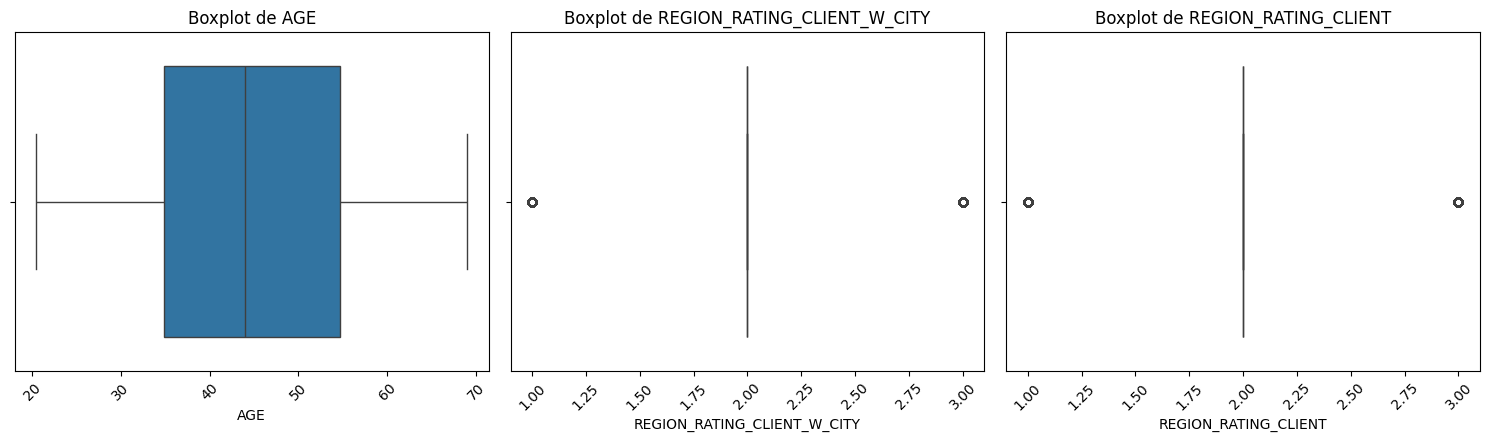

In [117]:
import seaborn as sns
import matplotlib.pyplot as plt

# Boxplot pour chaque variable numérique individuellement
plt.figure(figsize=(15, 8))

# Créer un boxplot pour chaque variable dans df_num_cols
for i, col in enumerate(df_num_cols.columns):
    plt.subplot(2, 3, i + 1)  # Organiser les graphiques en une grille (ici 2 lignes et 3 colonnes)
    sns.boxplot(x=df_num_cols[col])
    plt.title(f"Boxplot de {col}")
    plt.xticks(rotation=45)

plt.tight_layout()  # Ajuste l'espacement des graphiques pour qu'ils ne se chevauchent pas
plt.show()


In [103]:
print(df[['REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY']].describe())


       REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY
count          1.413701e+06                 1.413701e+06
mean           2.059638e+00                 2.037603e+00
std            4.957797e-01                 4.886431e-01
min            1.000000e+00                 1.000000e+00
25%            2.000000e+00                 2.000000e+00
50%            2.000000e+00                 2.000000e+00
75%            2.000000e+00                 2.000000e+00
max            3.000000e+00                 3.000000e+00


Le dataset n'admet d'outliers

Correlation

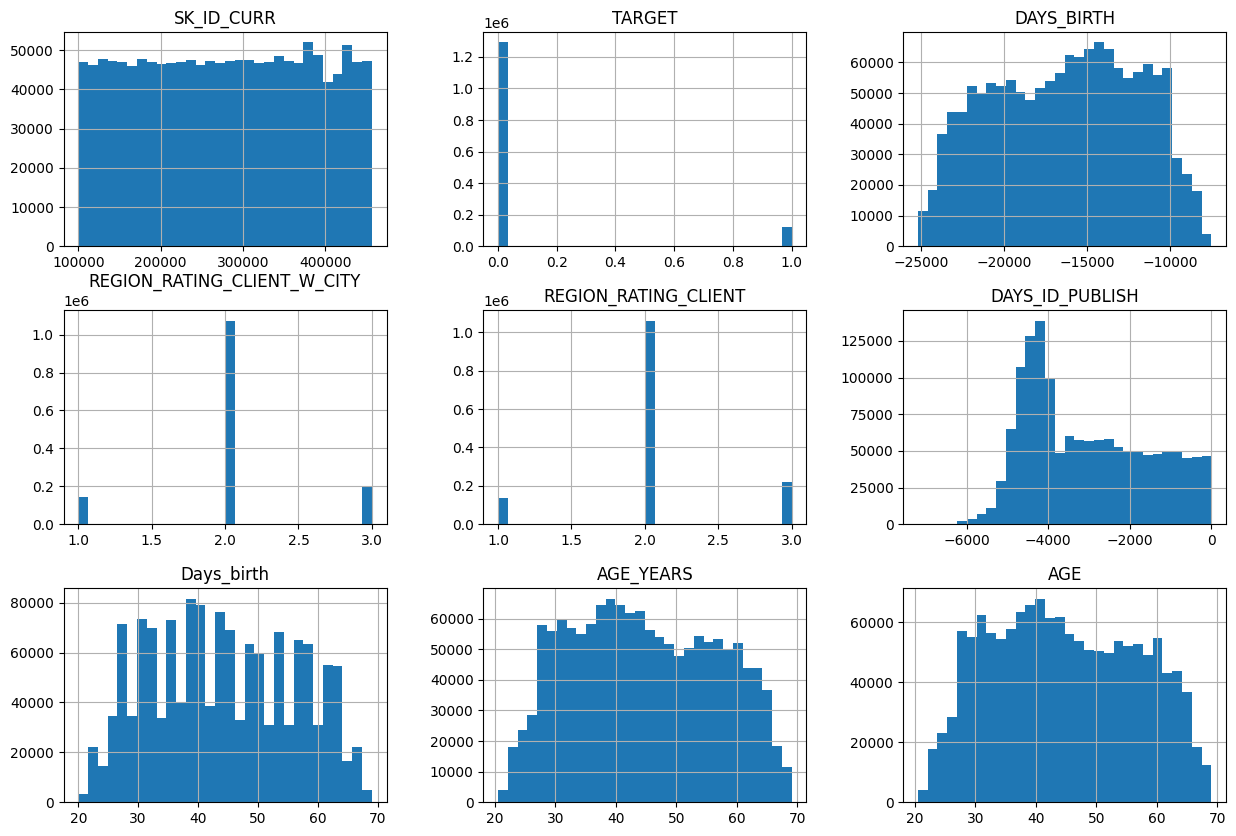

In [105]:
# Visualisation des distributions
df.hist(figsize=(15, 10), bins=30)
plt.show()



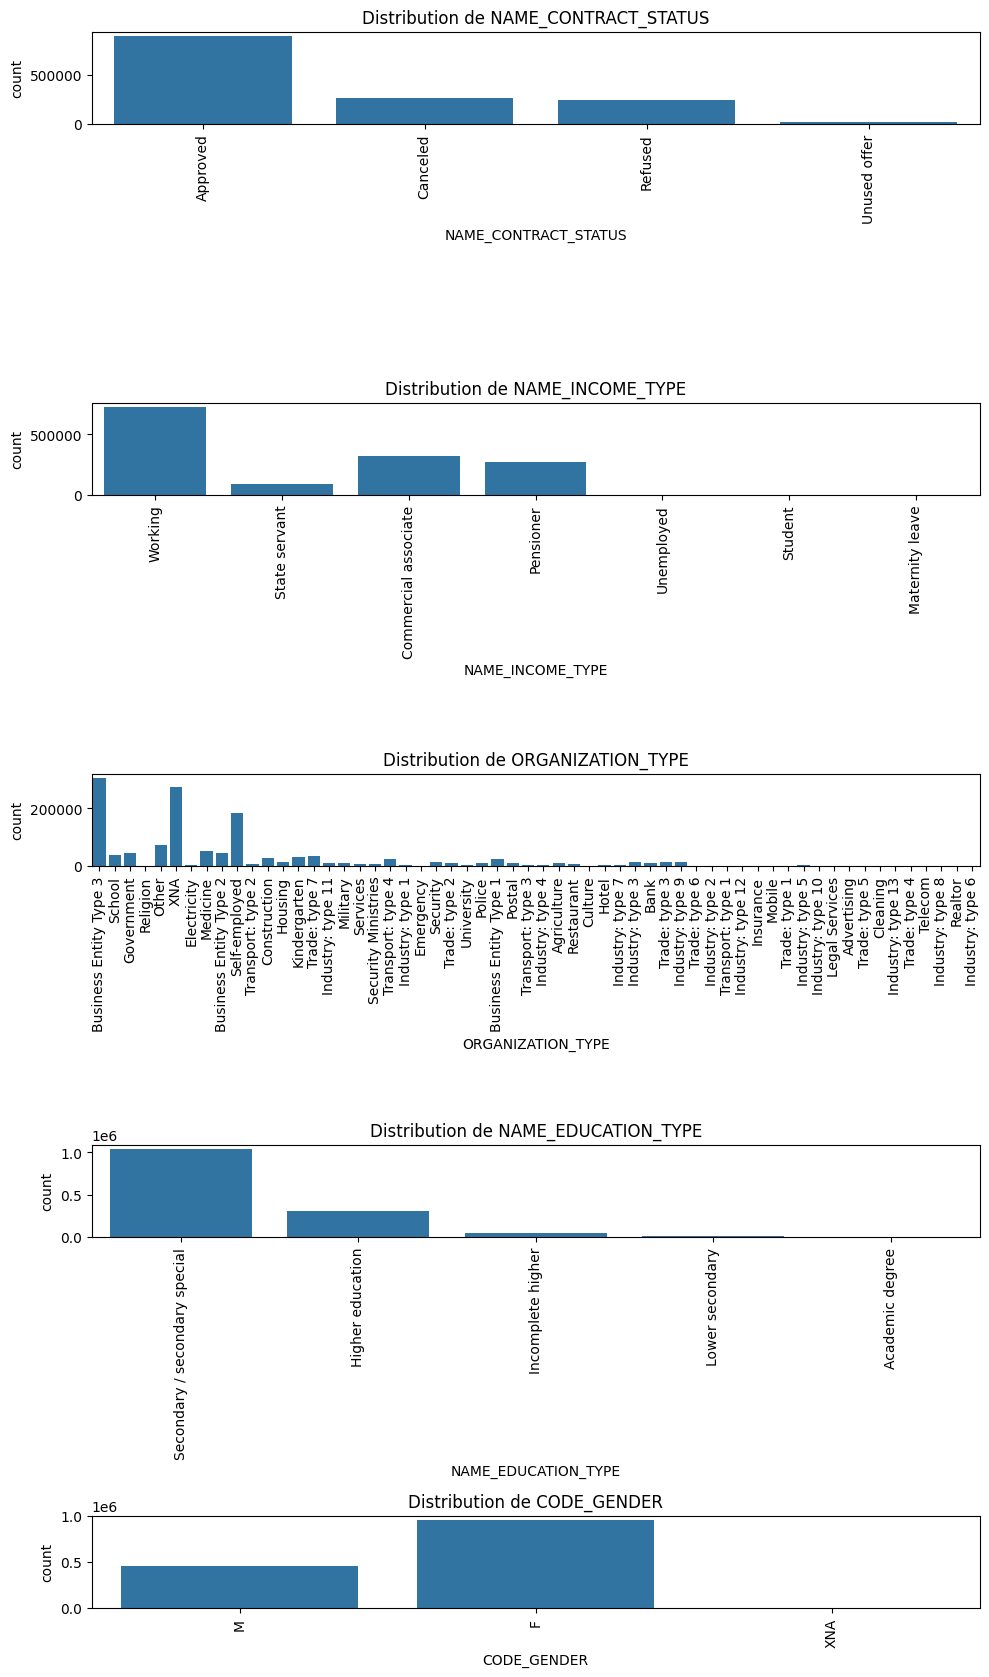

In [126]:
# Pour une colonne catégorielle
plt.figure(figsize=(10, 20))
for i, col in enumerate(df_cat_cols.columns):
    plt.subplot(6, 1, i + 1)  # Organiser les graphiques en grille (ici 3 lignes, 4 colonnes)
    sns.countplot(x=col, data=df_cat_cols)
    plt.title(f'Distribution de {col}')
    plt.xticks(rotation=90)  # Rotation des étiquettes si elles sont longues

# Ajuster l'espacement entre les graphiques
plt.tight_layout()
plt.show()


D'abord, on voit, que ce soit pour la target ou bien la colonne gender, les deux valeur ne sont pa sequilibré. Vizulaisons cela avec une pie plot.

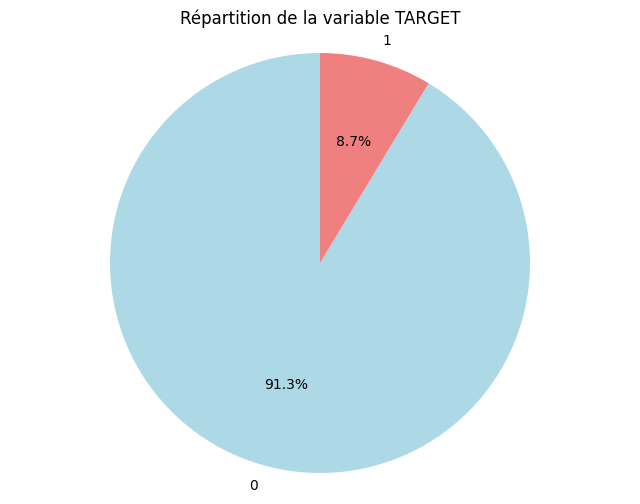

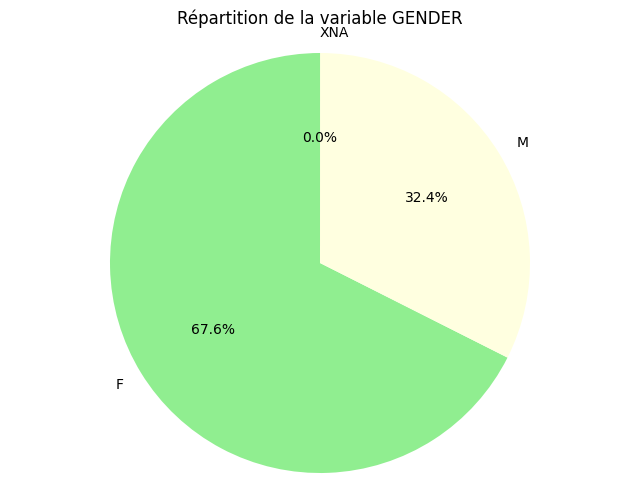

In [128]:
import matplotlib.pyplot as plt

# Tracer le graphique en cercle pour TARGET
plt.figure(figsize=(8, 6))
target_counts = df['TARGET'].value_counts()
target_labels = target_counts.index
target_sizes = target_counts.values

# Tracer le pie chart pour 'TARGET'
plt.pie(target_sizes, labels=target_labels, autopct='%1.1f%%', startangle=90, colors=['lightblue', 'lightcoral'])
plt.title('Répartition de la variable TARGET')
plt.axis('equal')  # Pour avoir un cercle parfait
plt.show()

# Tracer le graphique en cercle pour GENDER
plt.figure(figsize=(8, 6))
gender_counts = df['CODE_GENDER'].value_counts()
gender_labels = gender_counts.index  # Obtenir les étiquettes des valeurs
gender_sizes = gender_counts.values  # Obtenir les tailles (fréquences)

# Tracer le pie chart pour 'GENDER'
plt.pie(gender_sizes, labels=gender_labels, autopct='%1.1f%%', startangle=90, colors=['lightgreen', 'lightyellow'])
plt.title('Répartition de la variable GENDER')
plt.axis('equal')  # Pour avoir un cercle parfait
plt.show()
